In [1]:
import numpy as np
import pandas as pd
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score



In [2]:
files = glob.glob('*.csv')
dfs = []
for file in files:
    if file != 'extraterrestrial data.csv':
        df = pd.read_csv(file)
        dfs.append(df)
data=pd.concat(dfs)
data

,Date/Time,Lats,Longs,Orientation,[1] Dew Point Temperature (C),[1] Diffuse Horizontal Radiation (Wh/m2),[1] Direct Normal Radiation (Wh/m2),[1] Dry Bulb Temperature (C),[1] Relative Humidity (),[1] Total Sky Cover (tenths),[1] Wind Direction (°),[1] Wind Speed (m/s),BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)
0,Year 1 Jan 01 01:00,23.47,69.79,0.0,6.0,0.0,0.0,20.0,40.0,0.0,40.0,2.5,19.055440
1,Year 1 Jan 01 02:00,23.47,69.79,0.0,5.8,0.0,0.0,19.4,41.0,0.0,38.0,2.5,18.783099
2,Year 1 Jan 01 03:00,23.47,69.79,0.0,5.4,0.0,0.0,18.9,41.0,0.0,38.0,2.5,18.391790
3,Year 1 Jan 01 04:00,23.47,69.79,0.0,5.4,0.0,0.0,18.5,42.0,0.0,42.0,2.6,18.021314
4,Year 1 Jan 01 05:00,23.47,69.79,0.0,4.3,0.0,0.0,18.1,40.0,0.0,46.0,2.8,17.675530
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,Year 1 Dec 31 20:00,23.39,87.51,90.0,18.7,0.0,0.0,20.4,90.0,0.5,68.0,0.2,22.702643
8756,Year 1 Dec 31 21:00,23.39,87.51,90.0,18.2,0.0,0.0,19.5,92.0,0.2,66.0,0.2,21.824334
8757,Year 1 Dec 31 22:00,23.39,87.51,90.0,17.8,0.0,0.0,18.8,94.0,0.0,64.0,0.3,21.068009
8758,Year 1 Dec 31 23:00,23.39,87.51,90.0,17.7,0.0,0.0,18.3,96.0,0.1,66.0,0.3,20.407125


In [3]:
data.columns


Index(['Date/Time', 'Lats', 'Longs', 'Orientation',
       '[1] Dew Point Temperature (C)',
       '[1] Diffuse Horizontal Radiation (Wh/m2)',
       '[1] Direct Normal Radiation (Wh/m2)', '[1] Dry Bulb Temperature (C)',
       '[1] Relative Humidity ()', '[1] Total Sky Cover (tenths)',
       '[1] Wind Direction (°)', '[1] Wind Speed (m/s)',
       'BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)'],
      dtype='object')

In [4]:
data.describe()

,Lats,Longs,Orientation,[1] Dew Point Temperature (C),[1] Diffuse Horizontal Radiation (Wh/m2),[1] Direct Normal Radiation (Wh/m2),[1] Dry Bulb Temperature (C),[1] Relative Humidity (),[1] Total Sky Cover (tenths),[1] Wind Direction (°),[1] Wind Speed (m/s),BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)
count,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210219.000000
mean,23.393333,79.566667,135.000000,16.430544,94.286886,173.602675,25.744094,62.831031,3.458056,206.549416,1.473155,30.168432
std,0.063421,6.317416,100.623298,8.527406,115.625916,249.868796,7.119398,25.546457,4.275378,100.552894,1.042656,8.858089
min,23.310000,69.790000,0.000000,-40.300000,0.000000,0.000000,2.200000,1.000000,0.000000,0.000000,0.000000,5.188952
25%,23.310000,74.100000,67.500000,10.500000,0.000000,0.000000,21.700000,41.000000,0.000000,118.000000,0.700000,24.813117
50%,23.415000,79.965000,135.000000,18.700000,8.000000,3.000000,26.300000,66.000000,0.200000,239.000000,1.200000,29.439182
75%,23.440000,86.070000,202.500000,23.500000,200.000000,359.000000,30.100000,86.000000,9.000000,284.000000,2.000000,35.282591
max,23.470000,87.510000,270.000000,31.700000,463.000000,850.000000,47.400000,100.000000,10.000000,360.000000,7.300000,63.572849


In [5]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'].str.replace('Year 1 ', '2002'), format="%Y%b %d %H:%M")

In [6]:
%pip install ephem

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [7]:
import numpy as np
import pandas as pd

# Assuming you have the DataFrame 'data' with the given columns
# Set observer's latitude and longitude
lstm = 15 * 5.5  # Local Standard Time Meridian for India

# Calculate the day of the year from the 'Date/Time' column
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data['day'] = data['Date/Time'].dt.dayofyear

# Calculate Equation of Time (EoT)
B = 360 / 365 * (data['day'] - 81)
eot = 9.87 * np.sin(2 * np.radians(B)) - 7.53 * np.cos(np.radians(B)) - 1.5 * np.sin(np.radians(B))

# Calculate Time Correction (TC)
tc = 4 * (data['Longs'] - lstm) + eot

# Convert 'Date/Time' to local time (Local Standard Time, LST)
data['Local Time'] = data['Date/Time'] + pd.to_timedelta(tc, unit='m')

# Calculate Hour Angle (HRA)
data['hra'] = 15 * (data['Local Time'].dt.hour + data['Local Time'].dt.minute / 60 - 12)




In [8]:
data['Local Time']

0      2002-01-01 00:05:27.289300596
1      2002-01-01 01:05:27.289300596
2      2002-01-01 02:05:27.289300596
3      2002-01-01 03:05:27.289300596
4      2002-01-01 04:05:27.289300596
                    ...             
8755   2002-12-31 20:16:47.025904572
8756   2002-12-31 21:16:47.025904572
8757   2002-12-31 22:16:47.025904572
8758   2002-12-31 23:16:47.025904572
8759                             NaT
Name: Local Time, Length: 210232, dtype: datetime64[ns]

In [9]:
def solar_altitude_angle(LAT, delta, H):

    # Convert degrees to radians
    LAT_rad = np.radians(LAT)
    delta_rad = np.radians(delta)
    H_rad = np.radians(H)
    
    # Calculate solar elevation angle
    beta_rad = np.arcsin(np.sin(LAT_rad) * np.sin(delta_rad) + np.cos(LAT_rad) * np.cos(delta_rad) * np.cos(H_rad))
    beta_deg = np.degrees(beta_rad)
    
    return beta_deg
# Calculate declination
day_angle = 360 * (284 + data['day']) / 365
data['declination'] = 23.45 * np.sin(np.radians(day_angle))

# Assuming your DataFrame is named 'data'
# Extract required columns
LAT = data['Lats']
delta = data['declination']
H = data['hra']

# Calculate solar elevation angle
data['Solar Altitde Angle'] = solar_altitude_angle(LAT, delta, H)
latitude = data['Lats']

# Assuming data['hra'] represents hour angle
hour_angle = data['hra']

# Calculate solar zenith angle
data['solar_zenith'] = 90 - data['Solar Altitde Angle']

In [10]:


# Define a function to calculate solar azimuth angle for a single row
def calculate_single_solar_azimuth(local_hour, declination, latitude, hra):
    if local_hour < 12:
        return np.degrees(np.arccos((np.sin(np.radians(declination)) * np.cos(np.radians(latitude)) - np.cos(np.radians(declination)) * np.sin(np.radians(latitude)) * np.cos(np.radians(hra)))))
    else:
        return 360 - np.degrees(np.arccos((np.sin(np.radians(declination)) * np.cos(np.radians(latitude)) - np.cos(np.radians(declination)) * np.sin(np.radians(latitude)) * np.cos(np.radians(hra)))))

# Vectorized calculation of solar azimuth angle
data['solar_azimuth'] = np.where(data['Local Time'].dt.hour < 12,
                                  np.degrees(np.arccos((np.sin(np.radians(data['declination'])) * np.cos(np.radians(latitude)) - np.cos(np.radians(data['declination'])) * np.sin(np.radians(latitude)) * np.cos(np.radians(data['hra']))))),
                                  360 - np.degrees(np.arccos((np.sin(np.radians(data['declination'])) * np.cos(np.radians(latitude)) - np.cos(np.radians(data['declination'])) * np.sin(np.radians(latitude)) * np.cos(np.radians(data['hra']))))))


In [11]:
data['Wall Azimuth'] = data['Orientation'].replace({0: 180, 180: 0, 90: 270, 270: 90})

data['AOI'] = np.degrees(np.arccos(np.sin(np.radians(data['solar_zenith'])) * np.cos(np.radians(data['solar_azimuth']-data['Wall Azimuth']))))


In [12]:
def calculate_IRH(Tdb_C, Tdp_C):
    # Convert temperatures to Kelvin
    Tdb_K = Tdb_C + 273.15  # Drybulb temperature in Kelvin
    Tdp_K = Tdp_C + 273.15  # Dewpoint temperature in Kelvin
    
    # Calculate sky emissivity (ϵsky) using the correlation from Clark & Allen (1978)
    ϵsky_clear = 0.787 + 0.764 * np.log(Tdp_K / 273)
    
    # Stefan-Boltzmann constant in W/(m^2 K^4)
    sigma = 5.6697e-8
    
    # Calculate the rate of infrared radiation emitted from the sky (IRH)
    IRH = ϵsky_clear * sigma * Tdb_K**4
    return IRH

# Example usage:
Tdb_data_C = data['[1] Dry Bulb Temperature (C)']  # Drybulb temperature in Celsius
Tdp_data_C = data['[1] Dew Point Temperature (C)']  # Dewpoint temperature in Celsius

IRH_data = calculate_IRH(Tdb_data_C, Tdp_data_C)
def calculate_Tsky(IRH):
    # Stefan-Boltzmann constant in W/(m^2 K^4)
    sigma = 5.6697e-8
    
    # Calculate sky temperature (Tsky) using the formula
    Tsky = (IRH / sigma)**0.25 - 273.15
    return Tsky

# Example usage:
 # Rate of infrared radiation emitted from the sky in W/m^2

Tsky_data = calculate_Tsky(IRH_data)
data['Tsky'] = Tsky_data

In [13]:
Y = np.maximum(0.45, 0.55 + 0.437 * np.cos(np.radians(data['AOI'])) + 0.313 * np.cos(np.radians(data['AOI']))**2)

In [14]:
data['DNR on wall']=data['[1] Direct Normal Radiation (Wh/m2)']*np.cos(np.radians(data['AOI']))
data['Diffuse_on_wall']=data['[1] Diffuse Horizontal Radiation (Wh/m2)']*Y
data['E_ground']=(data['[1] Direct Normal Radiation (Wh/m2)']*np.sin(np.radians(data['Solar Altitde Angle']))+data['[1] Diffuse Horizontal Radiation (Wh/m2)'])*0.2*(1+np.cos(np.radians(data['Solar Altitde Angle'])))/2

In [15]:
data['H']=12.49+4.065*data['[1] Wind Speed (m/s)']+0.028*data['[1] Wind Speed (m/s)']**2

In [16]:
data['E/H']=(data['DNR on wall']+data['Diffuse_on_wall']+data['E_ground'])/data['H']
# data['t_longwave']=(data['[1] Dry Bulb Temperature (C)']-data['Tsky'])/data['H']
data

,Date/Time,Lats,Longs,Orientation,[1] Dew Point Temperature (C),[1] Diffuse Horizontal Radiation (Wh/m2),[1] Direct Normal Radiation (Wh/m2),[1] Dry Bulb Temperature (C),[1] Relative Humidity (),[1] Total Sky Cover (tenths),...,solar_zenith,solar_azimuth,Wall Azimuth,AOI,Tsky,DNR on wall,Diffuse_on_wall,E_ground,H,E/H
0,2002-01-01 01:00:00,23.47,69.79,0.0,6.0,0.0,0.0,20.0,40.0,0.0,...,178.763357,89.546635,180.0,90.009784,4.441786,-0.0,0.0,0.0,22.82750,0.0
1,2002-01-01 02:00:00,23.47,69.79,0.0,5.8,0.0,0.0,19.4,41.0,0.0,...,165.069484,90.380729,180.0,89.901907,3.826451,0.0,0.0,0.0,22.82750,0.0
2,2002-01-01 03:00:00,23.47,69.79,0.0,5.4,0.0,0.0,18.9,41.0,0.0,...,151.339062,92.589853,180.0,88.758166,3.258699,0.0,0.0,0.0,22.82750,0.0
3,2002-01-01 04:00:00,23.47,69.79,0.0,5.4,0.0,0.0,18.5,42.0,0.0,...,137.690493,96.032023,180.0,85.943742,2.880121,0.0,0.0,0.0,23.24828,0.0
4,2002-01-01 05:00:00,23.47,69.79,0.0,4.3,0.0,0.0,18.1,40.0,0.0,...,124.178882,100.501287,180.0,81.327899,2.241541,0.0,0.0,0.0,24.09152,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2002-12-31 20:00:00,23.39,87.51,90.0,18.7,0.0,0.0,20.4,90.0,0.5,...,128.888179,261.044129,270.0,39.746294,7.712980,0.0,0.0,0.0,13.30412,0.0
8756,2002-12-31 21:00:00,23.39,87.51,90.0,18.2,0.0,0.0,19.5,92.0,0.2,...,142.455627,265.165849,270.0,52.612105,6.742386,0.0,0.0,0.0,13.30412,0.0
8757,2002-12-31 22:00:00,23.39,87.51,90.0,17.8,0.0,0.0,18.8,94.0,0.0,...,156.139838,268.186131,270.0,66.152536,5.985289,0.0,0.0,0.0,13.71202,0.0
8758,2002-12-31 23:00:00,23.39,87.51,90.0,17.7,0.0,0.0,18.3,96.0,0.1,...,169.890252,269.919651,270.0,79.890262,5.485339,0.0,0.0,0.0,13.71202,0.0


In [17]:
data['Hour'] = data['Date/Time'].dt.hour
data['Windward'] = np.where(data['[1] Wind Direction (°)'] - data['Orientation'] >= 0, 1, 0.5)
data['sin_hour']=(1+np.sin(2 * (np.pi / 24) * data['Hour'] -28*np.pi/24))

In [18]:
data.columns

Index(['Date/Time', 'Lats', 'Longs', 'Orientation',
       '[1] Dew Point Temperature (C)',
       '[1] Diffuse Horizontal Radiation (Wh/m2)',
       '[1] Direct Normal Radiation (Wh/m2)', '[1] Dry Bulb Temperature (C)',
       '[1] Relative Humidity ()', '[1] Total Sky Cover (tenths)',
       '[1] Wind Direction (°)', '[1] Wind Speed (m/s)',
       'BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)',
       'day', 'Local Time', 'hra', 'declination', 'Solar Altitde Angle',
       'solar_zenith', 'solar_azimuth', 'Wall Azimuth', 'AOI', 'Tsky',
       'DNR on wall', 'Diffuse_on_wall', 'E_ground', 'H', 'E/H', 'Hour',
       'Windward', 'sin_hour'],
      dtype='object')

In [19]:
data

,Date/Time,Lats,Longs,Orientation,[1] Dew Point Temperature (C),[1] Diffuse Horizontal Radiation (Wh/m2),[1] Direct Normal Radiation (Wh/m2),[1] Dry Bulb Temperature (C),[1] Relative Humidity (),[1] Total Sky Cover (tenths),...,AOI,Tsky,DNR on wall,Diffuse_on_wall,E_ground,H,E/H,Hour,Windward,sin_hour
0,2002-01-01 01:00:00,23.47,69.79,0.0,6.0,0.0,0.0,20.0,40.0,0.0,...,90.009784,4.441786,-0.0,0.0,0.0,22.82750,0.0,1.0,1.0,1.258819
1,2002-01-01 02:00:00,23.47,69.79,0.0,5.8,0.0,0.0,19.4,41.0,0.0,...,89.901907,3.826451,0.0,0.0,0.0,22.82750,0.0,2.0,1.0,1.000000
2,2002-01-01 03:00:00,23.47,69.79,0.0,5.4,0.0,0.0,18.9,41.0,0.0,...,88.758166,3.258699,0.0,0.0,0.0,22.82750,0.0,3.0,1.0,0.741181
3,2002-01-01 04:00:00,23.47,69.79,0.0,5.4,0.0,0.0,18.5,42.0,0.0,...,85.943742,2.880121,0.0,0.0,0.0,23.24828,0.0,4.0,1.0,0.500000
4,2002-01-01 05:00:00,23.47,69.79,0.0,4.3,0.0,0.0,18.1,40.0,0.0,...,81.327899,2.241541,0.0,0.0,0.0,24.09152,0.0,5.0,1.0,0.292893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2002-12-31 20:00:00,23.39,87.51,90.0,18.7,0.0,0.0,20.4,90.0,0.5,...,39.746294,7.712980,0.0,0.0,0.0,13.30412,0.0,20.0,0.5,2.000000
8756,2002-12-31 21:00:00,23.39,87.51,90.0,18.2,0.0,0.0,19.5,92.0,0.2,...,52.612105,6.742386,0.0,0.0,0.0,13.30412,0.0,21.0,0.5,1.965926
8757,2002-12-31 22:00:00,23.39,87.51,90.0,17.8,0.0,0.0,18.8,94.0,0.0,...,66.152536,5.985289,0.0,0.0,0.0,13.71202,0.0,22.0,0.5,1.866025
8758,2002-12-31 23:00:00,23.39,87.51,90.0,17.7,0.0,0.0,18.3,96.0,0.1,...,79.890262,5.485339,0.0,0.0,0.0,13.71202,0.0,23.0,0.5,1.707107


In [20]:
data=data.dropna()

In [21]:
X = data.drop(['Date/Time', 'Lats', 'Longs', 'Orientation',
       '[1] Diffuse Horizontal Radiation (Wh/m2)',
       '[1] Direct Normal Radiation (Wh/m2)',
       '[1] Wind Direction (°)',
       'BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)',
       'day', 'Local Time', 'hra', 'declination', 'Solar Altitde Angle',
       'solar_zenith', 'solar_azimuth', 'Wall Azimuth', 'AOI', 'Tsky', 'H',
       'Hour'], axis = 1)
Y = data['BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)']

X.columns

Index(['[1] Dew Point Temperature (C)', '[1] Dry Bulb Temperature (C)',
       '[1] Relative Humidity ()', '[1] Total Sky Cover (tenths)',
       '[1] Wind Speed (m/s)', 'DNR on wall', 'Diffuse_on_wall', 'E_ground',
       'E/H', 'Windward', 'sin_hour'],
      dtype='object')

In [22]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

poly = PolynomialFeatures(degree=2,include_bias=True)
X_trans=poly.fit_transform(X)


In [23]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_trans, Y, test_size = 0.2, random_state = 0)

In [24]:
feature_names = poly.get_feature_names_out()

# Create DataFrame for transformed data
X_trans_df = pd.DataFrame(X_trans, columns=feature_names)
X_trans_df1=X_trans_df[0:170000]
Y1=Y[0:170000]
X_trans_df2=X_trans_df[170000:]
Y2=Y[170000:]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans_df1, Y1, test_size = 0.2, random_state = 0)

In [26]:
X_train.shape

(136000, 78)

In [27]:
reg = LinearRegression().fit(X_train, y_train)

In [28]:
reg.score(X_train, y_train)

0.9285340835982243

In [29]:
y_pred = reg.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
r2

0.928805970469812

In [30]:
y_pred2 = reg.predict(X_trans_df2)

# Calculate the R-squared score
r2 = r2_score(y_pred2,Y2)
r2

0.9028732200709182

In [31]:
coefficients = reg.coef_
for coef, feature in zip(coefficients, feature_names):
    print(f"Coefficient for {feature}: {coef}")

Coefficient for 1: 5.271472175797389e-09
Coefficient for [1] Dew Point Temperature (C): -0.07590874079471471
Coefficient for [1] Dry Bulb Temperature (C): 1.4111460368164934
Coefficient for [1] Relative Humidity (): 0.03557242174907505
Coefficient for [1] Total Sky Cover (tenths): -0.05419883295312366
Coefficient for [1] Wind Speed (m/s): -3.228971355069493
Coefficient for DNR on wall: 6.329120533775371
Coefficient for Diffuse_on_wall: 6.338251294691454
Coefficient for E_ground: 6.3577248487026194
Coefficient for E/H: -79.4491011263895
Coefficient for Windward: -0.6225162743509677
Coefficient for sin_hour: -0.48814158644239625
Coefficient for [1] Dew Point Temperature (C)^2: 0.001387701675929799
Coefficient for [1] Dew Point Temperature (C) [1] Dry Bulb Temperature (C): 0.009886420463342363
Coefficient for [1] Dew Point Temperature (C) [1] Relative Humidity (): 0.0021827681907161433
Coefficient for [1] Dew Point Temperature (C) [1] Total Sky Cover (tenths): -0.005533090118532858
Coeffi

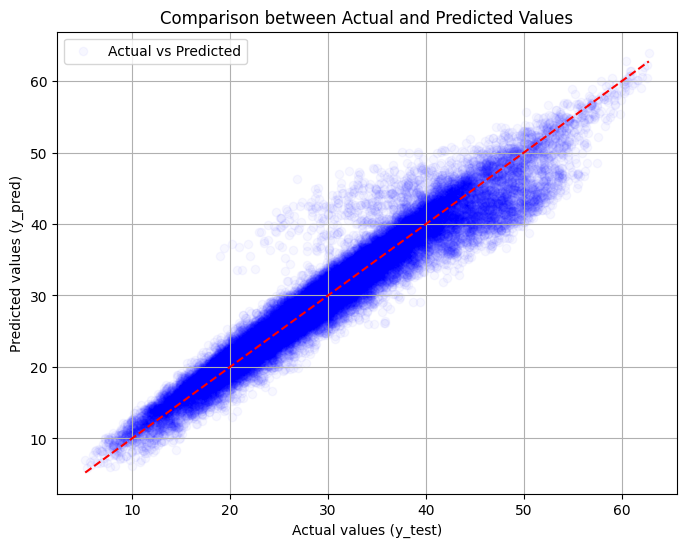

In [37]:
import matplotlib.pyplot as plt

# Plotting the comparison graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted',alpha=0.03)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Comparison between Actual and Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
